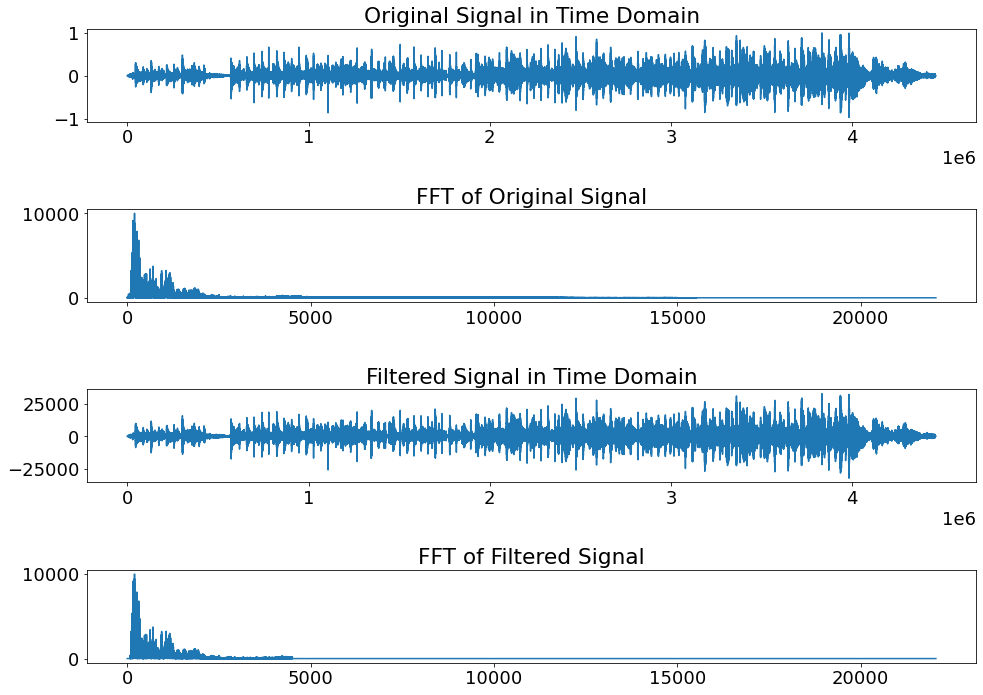

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.io import wavfile

input_file = 'input_audio.wav'
output_file = 'output_audio.wav'

# Read the audio file
sampling_rate, audio_signal = wavfile.read(input_file)

# If the audio is stereo, take one channel
if audio_signal.ndim > 1:
    audio_signal = audio_signal[:, 0]

# Normalize the audio signal to the range [-1, 1]
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Perform FFT on the audio signal
signal_fft = fft(audio_signal)

# Get the frequencies corresponding to the FFT values
frequencies = np.fft.fftfreq(len(audio_signal), 1 / sampling_rate)

# Define the band-pass filter range (for human voice and guitar)
low_cutoff = 80  # Low cutoff frequency in Hz
high_cutoff = 4500  # High cutoff frequency in Hz
# Create a band-pass filter
band_pass_filter = np.logical_and(np.abs(frequencies) >= low_cutoff, np.abs(frequencies) <= high_cutoff)
# Apply the band-pass filter
filtered_fft = signal_fft * band_pass_filter

# Perform the inverse FFT to get the cleaned signal
filtered_signal = ifft(filtered_fft)
# Take the real part of the inverse FFT (the output is complex)
filtered_signal = np.real(filtered_signal)
# Normalize the filtered signal to the range [-32767, 32767] for 16-bit PCM format
filtered_signal = np.int16(filtered_signal / np.max(np.abs(filtered_signal)) * 32767)

# Write the cleaned audio to a file
wavfile.write(output_file, sampling_rate, filtered_signal)


# Plot the results
plt.figure(figsize=(14, 10))

# Original signal in time domain
plt.subplot(4, 1, 1)
plt.plot(audio_signal)
plt.title('Original Signal in Time Domain')

# Original signal in frequency domain
plt.subplot(4, 1, 2)
plt.plot(frequencies[:len(frequencies) // 2], np.abs(signal_fft)[:len(frequencies) // 2])
plt.title('FFT of Original Signal')

# Filtered signal in time domain
plt.subplot(4, 1, 3)
plt.plot(filtered_signal)
plt.title('Filtered Signal in Time Domain')

# Filtered signal in frequency domain
filtered_signal_fft = fft(filtered_signal / 32767.0)  # Normalize back to [-1, 1] for FFT
plt.subplot(4, 1, 4)
plt.plot(frequencies[:len(frequencies) // 2], np.abs(filtered_signal_fft)[:len(frequencies) // 2])
plt.title('FFT of Filtered Signal')

plt.tight_layout()
plt.show()